# Homework 4

## Metropolis Algorithm Review

Let $f(x)$ be a function that is proportional to the desired probability density function $P(x)$.

1. Initialization: Choose an arbitrary point $x_t$ to be the first observation in the sample and choose an arbitrary probability density g(x) that generate a candidate for the next sample value $x$. We can choose $g(x)$ be a normal distribution $N(x,\sigma^2)$

2. For each iteration t:
    * Generate a candidate $x_c$ for the next sample by picking from the distribution $g(x_t)$.
    * Calculate the acceptance ratio $\alpha=f(x_c)/f(x_t)$, which will be used to decide whether to accept or reject the candidate.
    * Accept or reject:
        - Generate a uniform random number $u\sim U(0,1)$.
        - If $u\leq\alpha$, then accept the candidate by setting $x_{t+1}=x_c$,
        - If $u>\alpha$, then reject the candidate and set $x_{t+1}=x_{t}$ instead.

## Problem A

### Question statement

Use the Metropolis algorithm to generate a sequence of states (i.e. a sequence of particle 
position x, also called a Markov chain) according to the PDF $f(x)\propto e^{-\frac12 x^2}$  and evaluate 
the expectation values (mean values) of $x, x^2, x^3$ and $x^4$.  

In [1]:
# mute logging in jupyter notebook
import Logging
Logging.disable_logging(Logging.Warn)

# load dependency
using Distributions, Plots, StatsPlots, HypothesisTests

In [2]:
function Metorpolis(f::Function;x₀=0,g=x->Normal(x,1),n=10000)
    x=zeros(n)
    x[1] = x₀
    for t in 1:n-1
        xᶜ = rand(g(x[t])) 
        α = f(xᶜ)/f(x[t])
        u = rand()
        x[t+1] = u <= α ? xᶜ : x[t]
    end
    return x
end

Metorpolis (generic function with 1 method)

In [3]:
f(x) = exp(-x^2/2)

f (generic function with 1 method)

In [9]:
X = Metorpolis(f)

10000-element Vector{Float64}:
  0.0
 -0.24834622680726182
 -0.24834622680726182
  0.6734052441801622
  0.12319514065621495
  0.11038906822881368
  0.11038906822881368
  0.6745420674764773
  0.3929807242215307
  1.2486009970282748
 -0.11833669582101125
 -0.10134253022978586
  0.5430106463742495
  ⋮
 -0.016595794275692022
  0.25388600652155874
  0.25388600652155874
  0.25388600652155874
  0.25388600652155874
 -0.5022621114659782
 -0.25621635761727707
  0.4684168064642887
  0.37698798234725506
 -0.008670506333726458
 -0.008670506333726458
  0.06294775166265634

In [14]:
for k in 1:4
    EXᵏ=mean(X.^k)
    println("E[x^$k]=$EXᵏ")
end

E[x^1]=-0.011127725489119724
E[x^2]=0.990579951418093
E[x^3]=-0.019749201563955217
E[x^4]=2.921175835053134


## Problem B

### Question statement

Plot the histogram of the x values in the sequence and compare it with the PDF $f(x)$

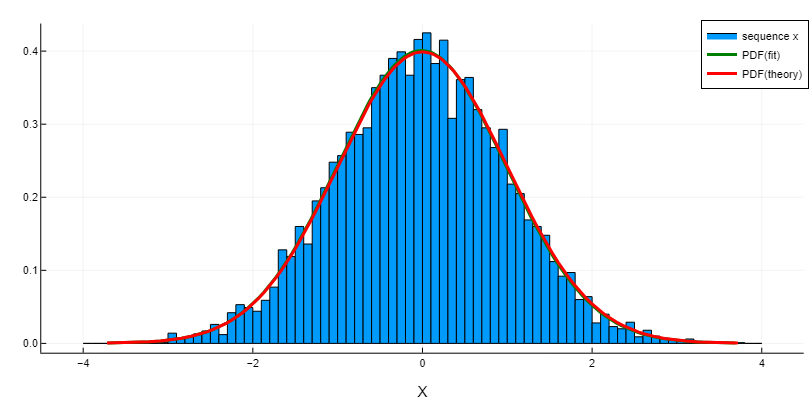

In [11]:
plotly()
histogram(X,normalize=:pdf,bins=-4:0.1:4,label="sequence x")
plot!(fit(Normal,X),label="PDF(fit)",lw=3,linecolor=:green)
plot!(Normal(0,1),label="PDF(theory)",lw=3,linecolor=:red)
xlabel!("X")

In [12]:
fit(Normal,X)

Normal{Float64}(μ=-0.011127725489119708, σ=0.9952166222202716)

In [13]:
ExactOneSampleKSTest(X,Normal(0,1))

Exact one sample Kolmogorov-Smirnov test
----------------------------------------
Population details:
    parameter of interest:   Supremum of CDF differences
    value under h_0:         0.0
    point estimate:          0.00868039

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.4359

Details:
    number of observations:   10000


The test result is "fail to reject $h_0$", which means the sample X can comes from normal distribution $N(0,1)$. Thus, we can claim that this sequence X generated from Metropolis algorithm is close to the theretical distribution $N(0,1)$.